In [1]:
Support Vector Regression (SVR) is a type of support vector machine (SVM) that is used for regression analysis. In SVR, the goal is to predict a continuous value, rather than a categorical value as in classification tasks.

Like other SVM models, SVR is based on the idea of finding a hyperplane in a high-dimensional space that maximally separates the data. However, instead of trying to separate the data points into classes, SVR tries to fit the data as closely as possible, while still maintaining a certain margin of error. This margin of error is controlled by a hyperparameter called epsilon.

SVR has several advantages, such as the ability to handle high-dimensional data and the use of kernel functions to handle non-linear relationships. It is often used in machine learning and data science applications, particularly for predicting real-valued outputs.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:/data Science/Machine Learning-A-Z-Codes-Datasets/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/Position_Salaries.csv")

In [4]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [7]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [9]:
y = y.reshape(len(y),1)

In [10]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling:

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [13]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [14]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training the SVR Model on whole dataset:

In [17]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X,y)

C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicting the new result:

In [20]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

# Visualising the SVR Result:

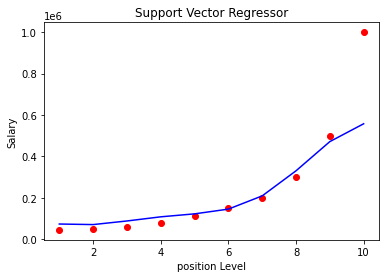

In [21]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Support Vector Regressor')
plt.xlabel('position Level')
plt.ylabel('Salary')
plt.show()

# Visualising the SVR results(for higher resolutionand smoother curve):

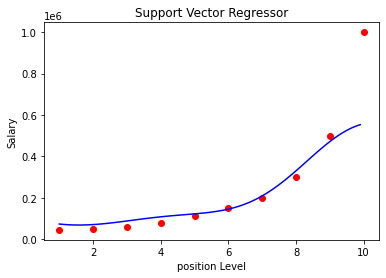

In [22]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Support Vector Regressor')
plt.xlabel('position Level')
plt.ylabel('Salary')
plt.show()